In [23]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
# Step 2: Define File Paths
RAW_DATA_PATH = 'C:/Users/gayth/student_productivity_mlops/data/student_productivity.csv'
PROCESSED_DATA_PATH = 'C:/Users/gayth/student_productivity_mlops/data/processed_data.csv'

In [25]:
# Step 3: Load data
def load_data(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully")
    return df

In [26]:
# Step 4: Explore data
def explore_data(df):
    print("\nDataset Info:")
    print(df.info())
    print("\nSummary Stats:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

In [27]:
# Step 5: Visualizations (basic)
def plot_distribution(df, column):
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [28]:
# Step 6: Clean data
def clean_data(df):
    df = df.copy()
    # Fill missing numeric values with mean
    df.fillna(df.mean(numeric_only=True), inplace=True)
    # Fill missing categorical values with mode
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].fillna(df[col].mode()[0])
    print("Missing values handled")
    return df

In [29]:
# Step 7: Feature engineering
def feature_engineering(df):
    df = df.copy()
    # Create a total social media usage column
    df['Total_Social_Media'] = (
        df['WhatsApp_Time'] + df['Insta_Reel_Freq'] +
        df['YouTube_Entertainment'] + df['Call_Chat_Time']
    )
    # drop ID/name if not useful
    # df.drop(['Student_ID', 'Student_Name'], axis=1, inplace=True)
    print("Feature engineering completed")
    return df

In [30]:
# Step 8: Save processed data
def save_data(df, file_path):
    df.to_csv(file_path, index=False)
    print(f"Cleaned data saved to {file_path}")

In [31]:
#  Step 9: Run the pipeline
def run_data_pipeline():
    df = load_data(RAW_DATA_PATH)
    explore_data(df)
    plot_distribution(df, 'WhatsApp_Time')
    df_clean = clean_data(df)
    df_fe = feature_engineering(df_clean)
    save_data(df_fe, PROCESSED_DATA_PATH)

Data Loaded Successfully

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             1000 non-null   int64  
 1   Student_Name           1000 non-null   object 
 2   Grade                  1000 non-null   int64  
 3   Section                1000 non-null   object 
 4   Maths                  1000 non-null   int64  
 5   Computer_Science       1000 non-null   int64  
 6   English                1000 non-null   int64  
 7   Tamil                  1000 non-null   int64  
 8   Physics                1000 non-null   int64  
 9   Chemistry              1000 non-null   int64  
 10  Total_Marks            1000 non-null   int64  
 11  Percentage             1000 non-null   float64
 12  Grade.1                1000 non-null   object 
 13  Pass/Fail              1000 non-null   object 
 14  WhatsApp_Time    

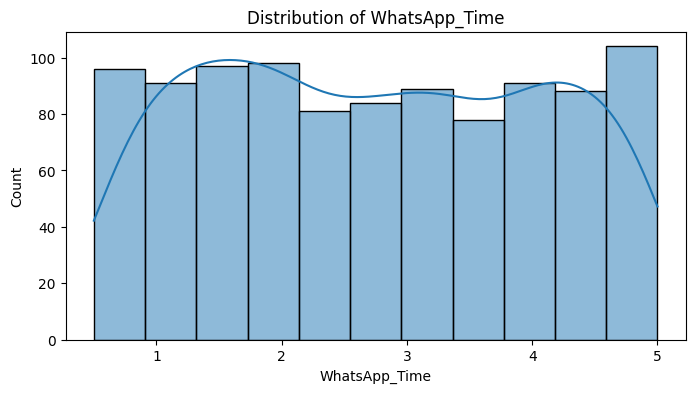

Missing values handled
Feature engineering completed
Cleaned data saved to C:/Users/gayth/student_productivity_mlops/data/processed_data.csv


In [32]:
# Trigger the pipeline
run_data_pipeline()